CASE DHAUZ

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC
from pycaret.classification import *
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go



In [2]:
#Lendo o conjunto de dados
df =  pd.read_csv(r'C:\Users\User\Downloads\covid.csv')
df.sample(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
155443,0d8ad5,1,1,11-06-2020,11-06-2020,9999-99-99,97,2,54,2,1,2,2,2,2,2,2,1,2,2,1,1,97
433342,15b172,1,1,07-05-2020,05-05-2020,9999-99-99,97,2,60,2,2,2,2,2,2,2,2,2,2,2,2,2,97
288410,053b8d,1,1,29-05-2020,23-05-2020,9999-99-99,97,2,54,2,2,2,2,2,2,2,2,2,2,2,2,2,97
229255,1e51a6,1,1,30-05-2020,28-05-2020,9999-99-99,97,2,60,2,2,2,2,2,2,2,2,2,2,2,99,2,97
204258,00fb95,2,2,02-05-2020,29-04-2020,05-05-2020,1,1,56,97,1,2,2,2,1,2,2,1,2,2,2,1,2


In [99]:
#Checando as dimensões da base e suas variáveis
df.shape
df['contact_other_covid'].value_counts()

1     221867
99    175031
2     169704
Name: contact_other_covid, dtype: int64

In [4]:
#checando as colunas
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

Pré Processamento

In [5]:
#Retirando a coluna id 
df.drop(['id'],axis = 1, inplace=True)

In [6]:
#checando se existem valores faltantes
faltantes = df.isnull().sum()
faltantes

sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [7]:
#Criando a funcao_valores para checar a quantidade de registros de determinado valor
def funcao_valores(data):
    for i in data.columns:
        print(f'Variável {i}')
        print(data[i].value_counts())
        print(" ")

In [8]:
#e a funcao_distinct para observar os valores presentes em cada variável
def funcao_distinct(data):
    for i in data.columns:
        print(f'Variável {i}')
        print(set(data[i]))
        print(" ")

Aplicando as funções anteriores

In [9]:
funcao_distinct(df)

Variável sex
{1, 2}
 
Variável patient_type
{1, 2}
 
Variável entry_date
{'09-03-2020', '25-02-2020', '02-06-2020', '15-04-2020', '19-01-2020', '24-06-2020', '26-01-2020', '29-03-2020', '18-05-2020', '14-04-2020', '04-05-2020', '20-03-2020', '13-02-2020', '02-05-2020', '04-02-2020', '04-06-2020', '26-04-2020', '26-05-2020', '26-06-2020', '05-06-2020', '07-04-2020', '22-03-2020', '13-04-2020', '12-01-2020', '20-05-2020', '30-01-2020', '03-04-2020', '10-03-2020', '10-06-2020', '25-04-2020', '07-02-2020', '15-06-2020', '17-06-2020', '23-01-2020', '25-01-2020', '21-06-2020', '24-02-2020', '13-03-2020', '03-05-2020', '01-04-2020', '23-05-2020', '19-05-2020', '14-06-2020', '18-02-2020', '14-01-2020', '17-02-2020', '23-04-2020', '06-01-2020', '10-05-2020', '30-04-2020', '20-02-2020', '21-02-2020', '10-04-2020', '19-06-2020', '21-01-2020', '27-01-2020', '10-01-2020', '22-06-2020', '20-04-2020', '07-05-2020', '10-02-2020', '20-01-2020', '15-02-2020', '07-03-2020', '25-03-2020', '21-05-2020', '2

In [10]:
funcao_valores(df)

Variável sex
2    287112
1    279490
Name: sex, dtype: int64
 
Variável patient_type
1    444689
2    121913
Name: patient_type, dtype: int64
 
Variável entry_date
15-06-2020    13261
16-06-2020    12776
23-06-2020    12556
22-06-2020    12378
12-06-2020    12151
17-06-2020    12144
26-06-2020    12049
25-06-2020    12043
08-06-2020    12015
10-06-2020    11987
24-06-2020    11961
18-06-2020    11936
19-06-2020    11923
09-06-2020    11865
11-06-2020    11561
05-06-2020    10920
01-06-2020    10717
03-06-2020    10580
04-06-2020    10368
02-06-2020    10102
25-05-2020     9572
27-05-2020     9508
29-05-2020     9387
26-05-2020     9227
28-05-2020     8995
22-05-2020     8753
18-05-2020     8662
20-05-2020     8398
21-05-2020     8327
15-05-2020     7842
19-05-2020     7826
14-05-2020     7303
12-05-2020     7072
13-05-2020     7026
11-05-2020     6919
08-05-2020     6216
20-06-2020     6064
04-05-2020     5915
07-05-2020     5833
06-05-2020     5772
13-06-2020     5691
06-06-2020     5

Criando uma funcao_corretora para substituir os valores das variáveis
Casos que possuiam valor 97(NO SE APLICA), 98(SE IGNORA) e 99(NO ESPECIFICADO) foram substituiídos pelo valor 1(NO). 
Valores que anteriormente eram 1, passaram a ser 0(SI)
As variáveis de data('entry_date', 'date_symptoms', 'date_died'), de idade('age'), e de resultado laboratorial(covid_res) serão tratadas posteriormente.

In [11]:
def funcao_corretora(data):
    for i in data.columns:
        if i in ['entry_date', 'date_symptoms', 'date_died','covid_res','age']:
            continue
        data[i].replace(1, 0, inplace = True) 
        data[i].replace(2, 1, inplace=True)
        data[i].replace(97, 1, inplace=True)
        data[i].replace(98, 1, inplace=True) 
        data[i].replace(99, 1, inplace=True)   
             
            
        

In [12]:
df1 = df.copy()

Aplicando a função corretora e checando

In [13]:
funcao_corretora(df1)

In [14]:
funcao_valores(df1)

Variável sex
1    287112
0    279490
Name: sex, dtype: int64
 
Variável patient_type
0    444689
1    121913
Name: patient_type, dtype: int64
 
Variável entry_date
15-06-2020    13261
16-06-2020    12776
23-06-2020    12556
22-06-2020    12378
12-06-2020    12151
17-06-2020    12144
26-06-2020    12049
25-06-2020    12043
08-06-2020    12015
10-06-2020    11987
24-06-2020    11961
18-06-2020    11936
19-06-2020    11923
09-06-2020    11865
11-06-2020    11561
05-06-2020    10920
01-06-2020    10717
03-06-2020    10580
04-06-2020    10368
02-06-2020    10102
25-05-2020     9572
27-05-2020     9508
29-05-2020     9387
26-05-2020     9227
28-05-2020     8995
22-05-2020     8753
18-05-2020     8662
20-05-2020     8398
21-05-2020     8327
15-05-2020     7842
19-05-2020     7826
14-05-2020     7303
12-05-2020     7072
13-05-2020     7026
11-05-2020     6919
08-05-2020     6216
20-06-2020     6064
04-05-2020     5915
07-05-2020     5833
06-05-2020     5772
13-06-2020     5691
06-06-2020     5

In [15]:
#Transformando a variável 'covid_res' em dummy 
df1 = pd.get_dummies(data=df1, columns=['covid_res'], drop_first=False)
df1.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'icu',
       'covid_res_1', 'covid_res_2', 'covid_res_3'],
      dtype='object')

In [16]:
#Transformando a variável 'date_died' em 0 se morreu e 1 se sobreviveu
df1['date_died'][df1['date_died'] !='9999-99-99'] = 0
df1['date_died'][df1['date_died'] =='9999-99-99'] = 1
df1['date_died'].value_counts()

1    530426
0     36176
Name: date_died, dtype: int64

Preparando a visualização do item a)

In [17]:
df2 = df1.copy()

In [18]:
df2['pregnancy'].replace(0, 'grávida', inplace = True) 
df2['pregnancy'].replace(1, 'não grávida', inplace=True) 

In [19]:
df2['hypertension'].replace(0, 'hipertensão', inplace = True) 
df2['hypertension'].replace(1, 'não hipertensão', inplace=True) 

In [20]:
df2['date_died'].replace(0, 'morreu', inplace = True) 
df2['date_died'].replace(1, 'sobreviveu', inplace=True) 

a) Desenvolva hipóteses e visualizações envolvendo riscos de internação ou morte
(coluna “icu” ou “death-date”) por COVID-19 para:

i) pacientes grávidas (coluna “pregnancy”);

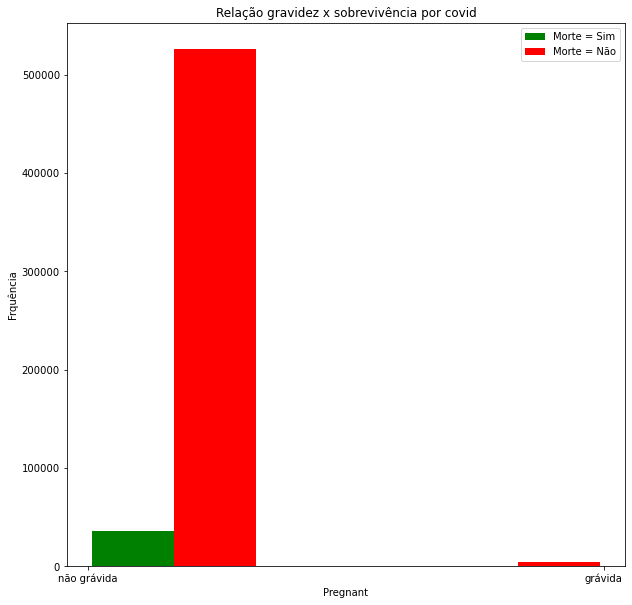

In [22]:
#histograma comparando duas categorias, gravidez/não gravidez
plt.figure(figsize=(10,10))
morte_no = df2[df2.date_died=='sobreviveu'].pregnancy
morte_yes = df2[df2.date_died=='morreu'].pregnancy

plt.xlabel("Pregnant")
plt.ylabel("Frquência")
plt.title("Relação gravidez x sobrevivência por covid")


plt.hist([morte_yes, morte_no], rwidth=0.95, color=['green','red'],label=['Morte = Sim','Morte = Não'], bins = 3)
plt.legend()

Como para grávidas a quuantidade é muito inferior, é feito um novo gráfico para melhor visualização

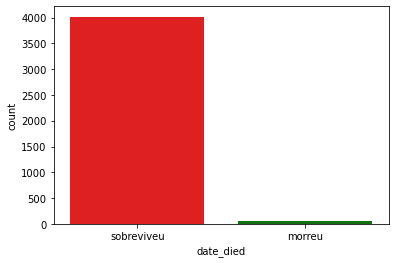

In [31]:
dfpreg = df2[df2['pregnancy']=='grávida']
sns.countplot(x = dfpreg['date_died'], palette=['red',"green"]);

In [41]:
p = len(dfpreg[dfpreg['date_died']=="morreu"])/(len(dfpreg[dfpreg['date_died']=="morreu"])+len(dfpreg[dfpreg['date_died']=="sobreviveu"]))*100
p = round(p,2)

In [42]:
print(f'A porcetagem de grávidas que morreram é {p}%')

A porcetagem de grávidas queu foram para morreram é 1.18%


Supondo uma hipótese de grávidez como fator de risco, os dados mostram que da quantidade de óbitos, menos de 1.2% ocorrem eram grávidas. Esse é umm resultado que não era esperado.

a) Desenvolva hipóteses e visualizações envolvendo riscos de internação ou morte
(coluna “icu” ou “death-date”) por COVID-19 para:

ii) pacientes com hipertensão (coluna “hypertension”);

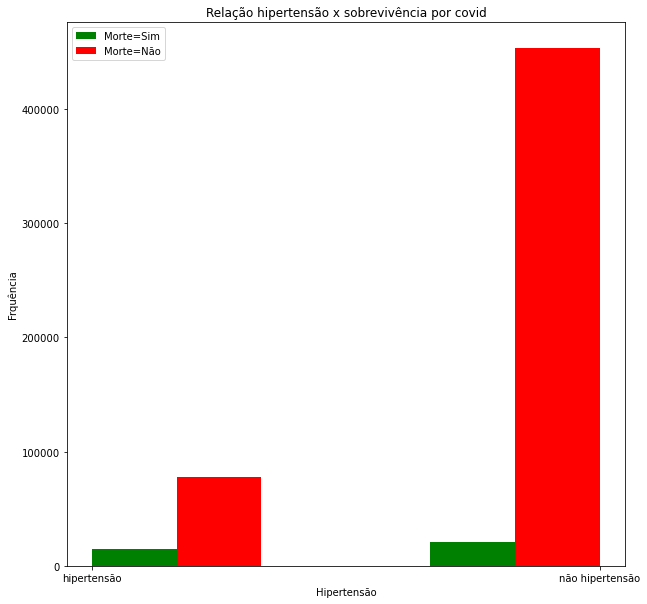

In [23]:
#histograma comparando duas categorias, hipertenso/não hipertenso
plt.figure(figsize=(10,10))
morte_no = df2[df2.date_died=='sobreviveu'].hypertension
morte_yes = df2[df2.date_died=='morreu'].hypertension

plt.xlabel("Hipertensão")
plt.ylabel("Frquência")
plt.title("Relação hipertensão x sobrevivência por covid")


plt.hist([morte_yes, morte_no], rwidth=1, color=['green','red'],label=['Morte=Sim','Morte=Não'], bins=3)
plt.legend()

In [58]:
dfh = df2[df2['hypertension']=='hipertensão']
z = len(dfh[dfh['date_died']=="morreu"])/(len(dfh[dfh['date_died']=="morreu"])+len(dfh[dfh['date_died']=="sobreviveu"]))*100
z = round(z,2)
print('Comparando a população de hipertensos com a de não hipertensos, há uma clara evidência de que talvez a hiperensão seja um fator que contribua para a morte por covid19')
print(f'Dos hipertensos {z}% morreram de covid19')

Comparando a população de hipertensos com a de não hipertensos, há uma clara evidência de que talvez a hiperensão seja um fator que contribua para a morte por covid19
Dos hipertensos 16.36% morreram de covid19


Supondo a hipótese de hipertensão como fator de risco, podemos dizer comparando os gráficos, que a porcentagem de óbitos no grupo de hipertensos é superior a de obitos no grupo dos não hipertensos. Confirmando a hipótese inicial.

b) Desenvolva um modelo preditivo de classificação para predição da variável de
internação (coluna “icu”) da base de dados e avalie métricas relevantes;

Retirando as colunas de data para preparar o modelo

In [61]:
df1.drop(['entry_date', 'date_symptoms'],axis = 1, inplace=True)

In [62]:
df1.columns

Index(['sex', 'patient_type', 'date_died', 'intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu', 'covid_res_1', 'covid_res_2',
       'covid_res_3'],
      dtype='object')

In [63]:
#separando a variável dependente das independentes
X = df1.drop('icu',axis='columns')
y = df1['icu']

In [64]:
X.columns

Index(['sex', 'patient_type', 'date_died', 'intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res_1', 'covid_res_2',
       'covid_res_3'],
      dtype='object')

A variável icu está claramente desbalanceada. A técnica de SMOTE será aplicada.

In [67]:
y.value_counts()

1    556490
0     10112
Name: icu, dtype: int64

In [68]:
#Over Sampling da amostra, pois para a variavél resposta 'icu' há desbalanceamento
#SMOTENC funciona analogamente ao SMOTE, mas permite a presença de variáveis categóricas
smotenc = SMOTENC([0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],random_state = 42)
X_oversample, y_oversample = smotenc.fit_resample(X, y)

In [69]:
#checando se a categoria minoria agora está igual a de maioria
y_oversample.value_counts()

0    556490
1    556490
Name: icu, dtype: int64

In [70]:
#separando em treino e teste com a variável y pós SMOTENC estratificando para termos a mesma quantidade de cada categoria no teste
X_train, X_test, y_train, y_test = train_test_split(X_oversample,y_oversample,test_size=0.2, stratify = y_oversample)

In [71]:
y_test.value_counts()

0    111298
1    111298
Name: icu, dtype: int64

In [72]:
#Copiando para outro dataframe para utilizarmos a lib PyCaret
DF = X_oversample.copy()
DF['icu'] = y_oversample.copy()
DF=pd.DataFrame(DF)
DF.head()

,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res_1,covid_res_2,covid_res_3,icu
0,1,0,1,1,1,27,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0,1,1,1,24,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,54,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1
3,1,1,1,1,0,30,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
4,0,1,0,1,1,60,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,1


UTILIZANDO O PyCaret

In [73]:
#Utilizando os classificadores da biblioteca PyCaret que testa alguns modelos e devolve alguns resultados.
from pycaret.classification import *

clf1 = setup(data = DF, target = 'icu')

,Description,Value
0,session_id,1949
1,Target,icu
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1112980, 22)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [74]:
#Seleciono alguns modelos da liista models() que acredito terem bom ajuste
best = compare_models(include = ['dt','rf','ada','lr','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9364,0.9781,0.8999,0.9707,0.9340,0.8727,0.8751,45.4540
dt,Decision Tree Classifier,0.9350,0.9713,0.8948,0.9731,0.9323,0.8701,0.8729,2.3010
lightgbm,Light Gradient Boosting Machine,0.9165,0.9683,0.8407,0.9908,0.9096,0.8330,0.8427,3.3810
lr,Logistic Regression,0.9044,0.9607,0.8216,0.9845,0.8957,0.8087,0.8200,29.3770
ada,Ada Boost Classifier,0.9042,0.9625,0.8207,0.9852,0.8955,0.8084,0.8199,15.4330


In [75]:
#como a arvore de decisao e as florestas aleatorias tiveram resultados similares e satisfatórios, optei pela arvore, por ser
#menos custosa computacionalmente
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9348,0.9712,0.8934,0.9741,0.9320,0.8697,0.8727
1,0.9357,0.9715,0.8966,0.9725,0.9330,0.8713,0.8740
2,0.9342,0.9706,0.8946,0.9715,0.9315,0.8684,0.8711
3,0.9352,0.9716,0.8937,0.9746,0.9324,0.8704,0.8734
4,0.9336,0.9709,0.8924,0.9726,0.9308,0.8673,0.8702
5,0.9346,0.9707,0.8947,0.9722,0.9318,0.8691,0.8719
6,0.9367,0.9722,0.8973,0.9740,0.9341,0.8733,0.8761
7,0.9357,0.9717,0.8971,0.9722,0.9331,0.8714,0.8741
8,0.9344,0.9712,0.8925,0.9741,0.9315,0.8688,0.8719
9,0.9356,0.9717,0.8954,0.9736,0.9329,0.8711,0.8740


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

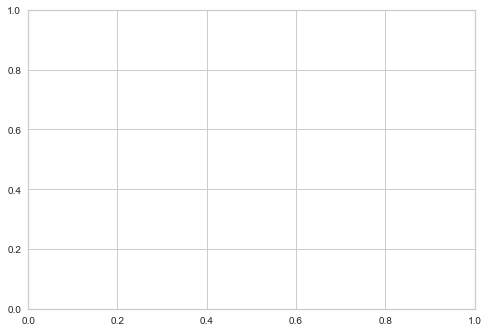

In [76]:
#aqui avaliamos o modelo, podendo ver a matriz de confusão, algumas métricas e feature importance
evaluate_model(dt)

Tunnando os hiperparametros do modelo com o RandomizedSearchCV

In [77]:
#seleciono alguns hiper paramemtros para testar

criterion = ['gini', 'entropy']
splitter = ['best','random']
max_depth = [int(x) for x in np.linspace(1, 50, num =25)]
max_depth.append(None)
min_samples_split = [1,2,5]
min_samples_leaf = [1,2,5]


random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
print(random_grid)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 50, None], 'min_samples_split': [1, 2, 5], 'min_samples_leaf': [1, 2, 5]}


In [63]:
#Crio o classificador
dt = DecisionTreeClassifier()
#escolho 100 combinações de parametros com 3 fold cross validation, 
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter =100, cv = 3, verbose=3, random_state=42, n_jobs = -1)
#Treino o modelo de random search
dt_random.fit(X_train,y_train)







Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=None,
                                                    splitter='best'),
              

In [64]:
#qual combinacao de parametros se saiu melhor
dt_random.best_params_

{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 41,
 'criterion': 'entropy'}

In [80]:
#crio o modelo com os parametros anteriores
dt2 = DecisionTreeClassifier(criterion= 'entropy',
 min_samples_split= 5,
 min_samples_leaf=1,
splitter= 'random',
 max_depth= 41,
 
       random_state=42                      
)

In [81]:
#Treino e analiso algumas métricas do modelo
dt2.fit(X_train, y_train)
y_predicao = dt2.predict(X_test)
print(accuracy_score(y_test, y_predicao))

0.9365577099318946


In [73]:
print(classification_report(y_test, y_predicao))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94    111298
           1       0.98      0.90      0.93    111298

    accuracy                           0.94    222596
   macro avg       0.94      0.94      0.94    222596
weighted avg       0.94      0.94      0.94    222596



Após o tunning obtemos resultados pouquíssimo melhores, mas melhores.
O modelo final tem acurácia próxima dos 94% com um bom recall/precisão(pequena quantidade de falsos positivos/negativos) para ambas as classes.


c) Qual a variável que tem o maior impacto nos pacientes que estão em unidade de
terapia intensiva (variável “icu” no dataset)?

In [82]:
caracteristicas = X_oversample.columns
caracteristicas

Index(['sex', 'patient_type', 'date_died', 'intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res_1', 'covid_res_2',
       'covid_res_3'],
      dtype='object')

In [84]:
importancias = dt2.feature_importances_
importancias

array([0.00971705, 0.75268183, 0.00398107, 0.07820539, 0.00753359,
       0.08023911, 0.00136517, 0.0081085 , 0.00252694, 0.00197925,
       0.00436929, 0.00850198, 0.00433147, 0.00514553, 0.00707424,
       0.00300334, 0.00389076, 0.00380192, 0.00397164, 0.00546859,
       0.00410333])

In [85]:
indices = np.argsort(importancias)
indices

array([ 6,  9,  8, 15, 17, 16, 18,  2, 20, 12, 10, 13, 19, 14,  4,  7, 11,
        0,  3,  5,  1], dtype=int64)

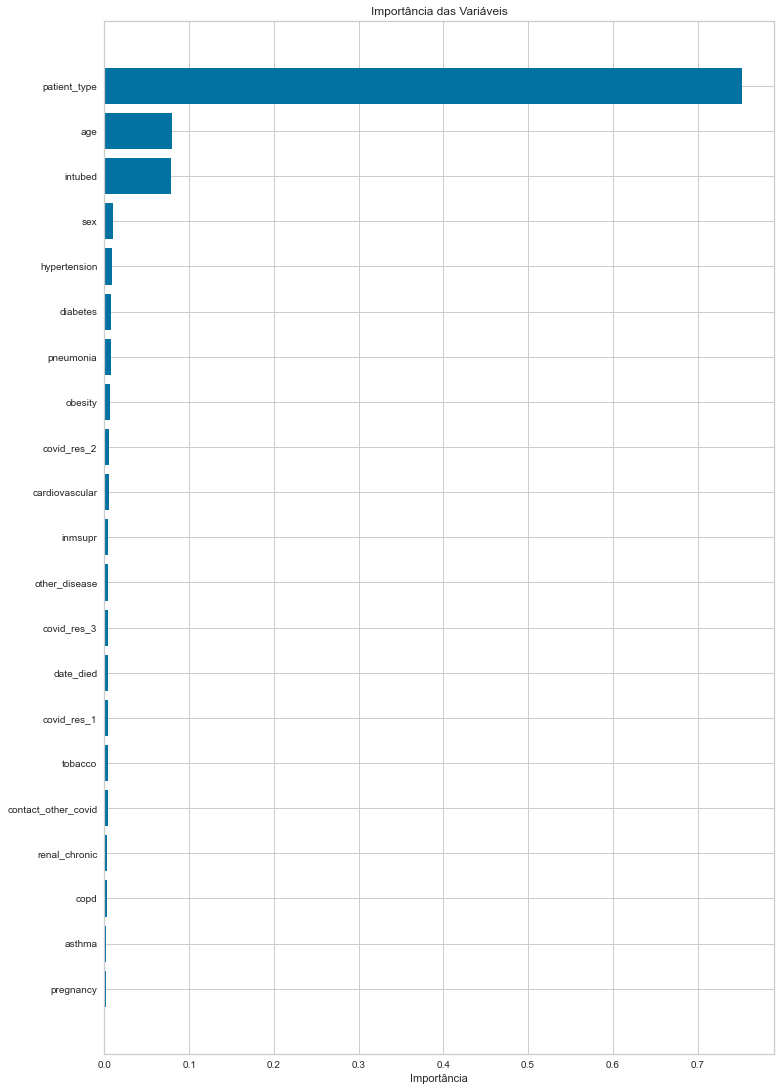

In [86]:
#gráfico de barras horizontal com a variáveis e suas imiportâncias no modelo
plt.figure(figsize=(12,19))
plt.title('Importância das Variáveis')
plt.barh(range(len(indices)), importancias[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importância')
plt.show();

patient_type, age e intubed foram as 3 variáveis com maior importância.
Mas a variável patient_type foi a que teve a maior.

d) (BONUS) Qual paciente possui maior probabilidade de sair vivo

In [87]:
#padronizar as idades entre 0 e 1 para ficar na mesma escala das outras variáveiis
scaler = MinMaxScaler()

In [88]:
#usando o minmax
data_scaled = scaler.fit_transform(DF['age'].values.reshape(-1, 1))
df_scaled = pd.DataFrame(data_scaled)

In [89]:
#retirando a coluna age antes de escalonar e colocando ela após escalonar
DF.drop(['age'],axis = 1, inplace=True)
DF['age'] = df_scaled
DF.head()

,sex,patient_type,date_died,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res_1,covid_res_2,covid_res_3,icu,age
0,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0.225
1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0.200
2,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,0,1,0.450
3,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,0.250
4,0,1,0,1,1,1,0,1,1,1,...,0,1,1,1,1,1,0,0,1,0.500


In [94]:
#analisando as outras variiáveis quando agrupadas por data de morte
polar=DF.groupby("date_died").mean()
polar.head()

,sex,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res_1,covid_res_2,covid_res_3,icu,age
date_died,,,,,,,,,,,,,,,,,,,,,
0,0.675476,0.985274,0.346083,0.071728,0.999341,0.642332,0.975890,0.994289,0.983192,0.619910,...,0.964618,0.729961,0.957585,0.924139,0.855498,0.764790,0.186762,0.048448,0.131098,0.484971
1,0.545438,0.491357,0.862171,0.630854,0.992460,0.832454,0.986007,0.978418,0.983012,0.801927,...,0.975311,0.818566,0.983505,0.925595,0.660982,0.401114,0.466623,0.132262,0.604581,0.359236


In [95]:
#transformando o groupby um dataframe com 3 colunas, date_died, value e variable
polar=DF.groupby("date_died").mean().reset_index()
polar=pd.melt(polar,id_vars=["date_died"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="date_died", line_close=True,height=500,width=900)
fig4.show()

A linha azul date_died = 0 indica as mortes
Através do gráfico podemos comparar os que morreram com os que não morreram com todas as variáveis
Neste caso, focando em não mortes (died=1), a maior probabilidade de sair com vida é dos pacientes que testaram negativo(covid_res2), não obesos, não foram para icu, possuem menor idade, não são hipertensos,
não tiveram pneumonia, não foram intubados, não são diabeticos, sexo feminino, e os que não ficaram hospitalizados.